

.. redirect-from:: /gallery/subplots_axes_and_figures/colorbar_placement

# Placing colorbars

Colorbars indicate the quantitative extent of image data.  Placing in
a figure is non-trivial because room needs to be made for them.

## Automatic placement of colorbars

The simplest case is just attaching a colorbar to each Axes.  Note in this
example that the colorbars steal some space from the parent Axes.


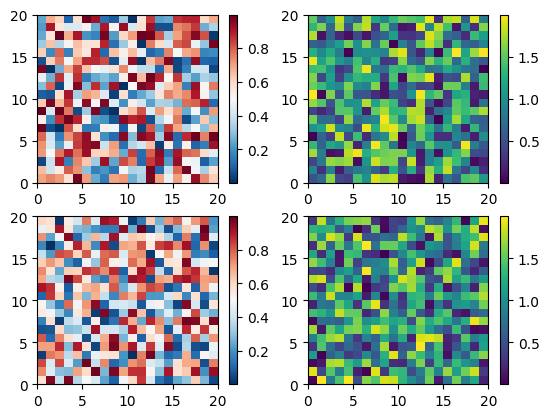

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

The first column has the same type of data in both rows, so it may be
desirable to have just one colorbar. We do this by passing `.Figure.colorbar`
a list of Axes with the *ax* kwarg.



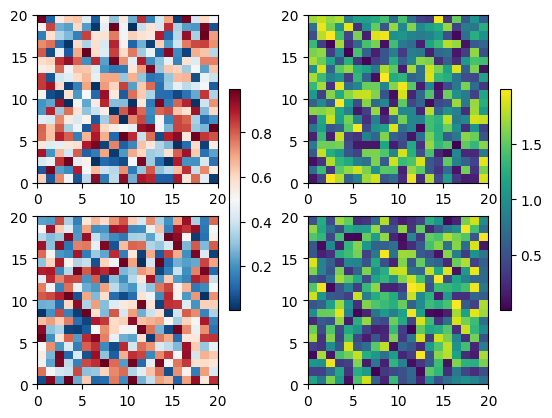

In [2]:
fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)

The stolen space can lead to Axes in the same subplot layout
being different sizes, which is often undesired if the the
x-axis on each plot is meant to be comparable as in the following:



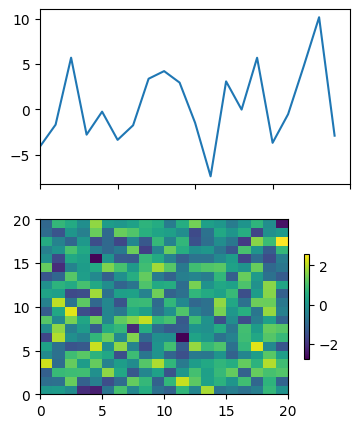

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)
X = np.random.randn(20, 20)
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

This is usually undesired, and can be worked around in various ways, e.g.
adding a colorbar to the other Axes and then removing it.  However, the most
straightforward is to use `constrained layout <constrainedlayout_guide>`:



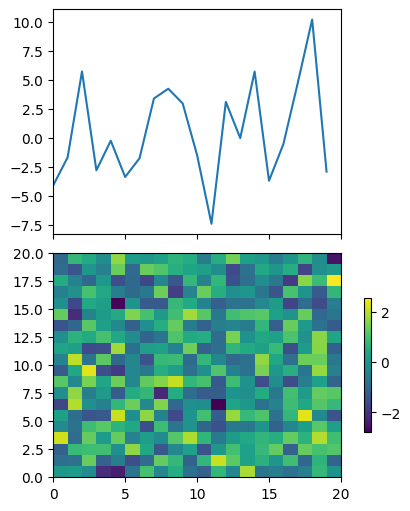

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True, layout='constrained')
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

Relatively complicated colorbar layouts are possible using this
paradigm.  Note that this example works far better with
``layout='constrained'``



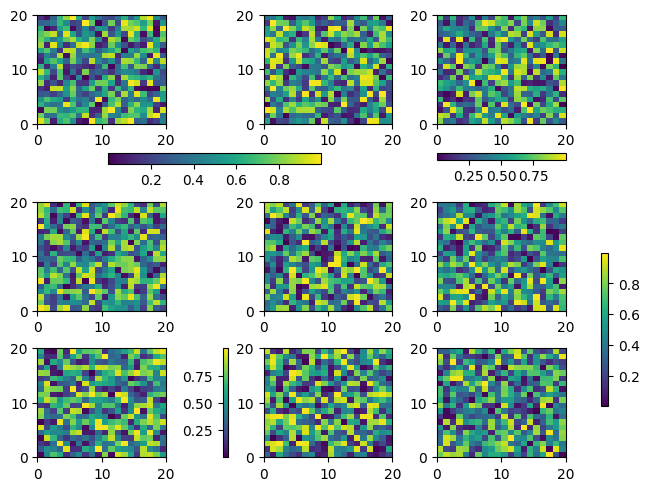

In [5]:
fig, axs = plt.subplots(3, 3, layout='constrained')
for ax in axs.flat:
    pcm = ax.pcolormesh(np.random.random((20, 20)))

fig.colorbar(pcm, ax=axs[0, :2], shrink=0.6, location='bottom')
fig.colorbar(pcm, ax=[axs[0, 2]], location='bottom')
fig.colorbar(pcm, ax=axs[1:, :], location='right', shrink=0.6)
fig.colorbar(pcm, ax=[axs[2, 1]], location='left')

## Adjusting the spacing between colorbars and parent Axes

The distance a colorbar is from the parent Axes can be adjusted with the
*pad* keyword argument.  This is in units of fraction of the parent Axes
width, and the default for a vertical Axes is 0.05 (or 0.15 for a horizontal
Axes).



Text(0.5, 0.98, "layout='constrained'")

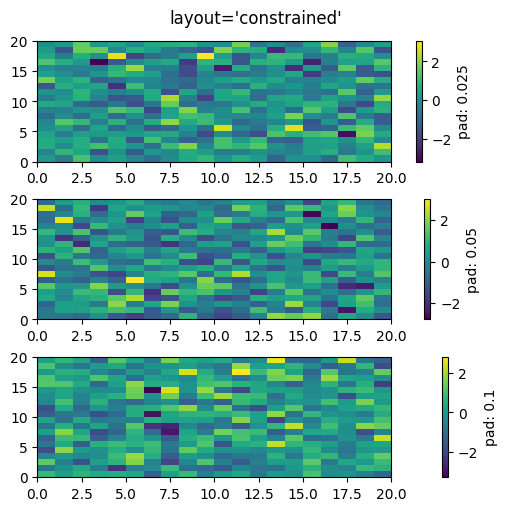

In [6]:
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("layout='constrained'")

Note that if you do not use constrained layout, the pad command makes the
parent Axes shrink:



Text(0.5, 0.98, 'No layout manager')

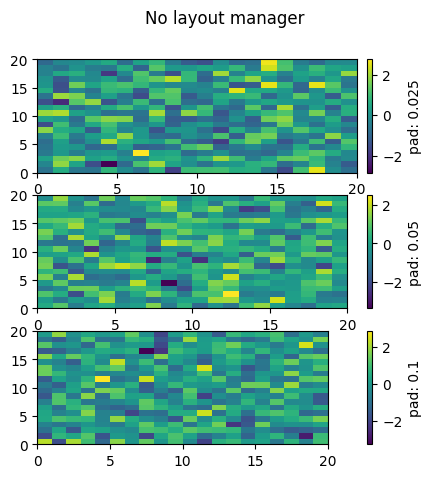

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("No layout manager")

## Manual placement of colorbars

Sometimes the automatic placement provided by ``colorbar`` does not
give the desired effect.  We can manually create an Axes and tell
``colorbar`` to use that Axes by passing the Axes to the *cax* keyword
argument.

### Using ``inset_axes``

We can manually create any type of Axes for the colorbar to use, but an
`.Axes.inset_axes` is useful because it is a child of the parent Axes and can
be positioned relative to the parent.  Here we add a colorbar centered near
the bottom of the parent Axes.



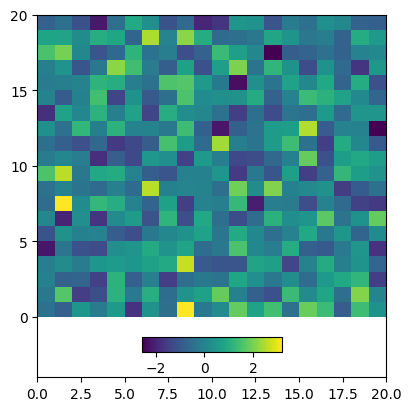

In [8]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')

`.Axes.inset_axes` can also specify its position in data coordinates
using the *transform* keyword argument if you want your Axes at a
certain data position on the graph:



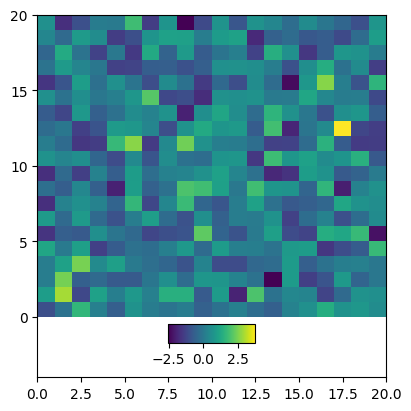

In [9]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([7.5, -1.7, 5, 1.2], transform=ax.transData)
fig.colorbar(pcm, cax=cax, orientation='horizontal')

### Colorbars attached to fixed-aspect-ratio Axes

Placing colorbars for Axes with a fixed aspect ratio pose a particular
challenge as the parent Axes changes size depending on the data view.



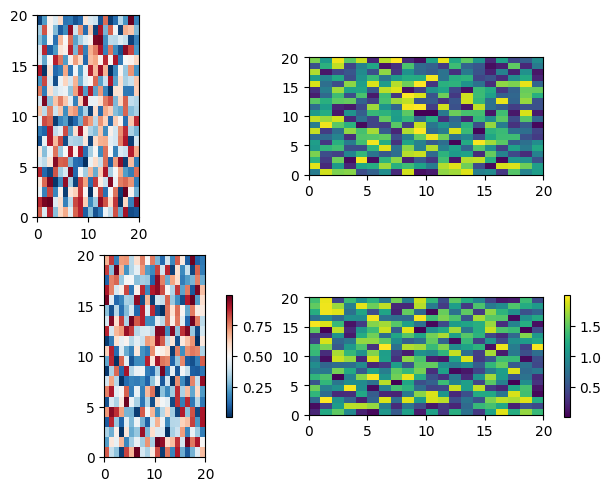

In [10]:
fig, axs = plt.subplots(2, 2,  layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            fig.colorbar(pcm, ax=ax, shrink=0.6)

We solve this problem using `.Axes.inset_axes` to locate the Axes in "axes
coordinates" (see `transforms_tutorial`).  Note that if you zoom in on
the parent Axes, and thus change the shape of it, the colorbar will also
change position.



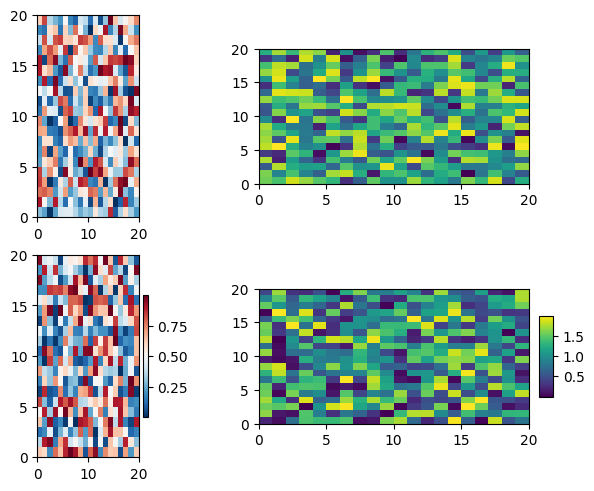

In [11]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
            fig.colorbar(pcm, cax=cax)

.. seealso::

 `axes_grid` has methods for manually creating colorbar Axes as well:

 - `demo-colorbar-with-inset-locator`
 - `demo-colorbar-with-axes-divider`

